In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

base_dir = '/Users/TrentHenry/Documents/Trent_PhD/2023_2024_Year_2/Spring 2024/CMSE 890/Project/'
data_dir = os.path.join(base_dir, 'datasets')  # Adjust 'your_dataset_folder' with the actual folder containing 'close' and 'open' subdirectories

batch_size = 32
img_height = 224
img_width = 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,  # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # set as validation data
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 'sigmoid' for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 30
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/30
15/15 [==============================] - 7s 459ms/step - loss: 0.9498 - accuracy: 0.6271 - val_loss: 1.0259 - val_accuracy: 0.3958
Epoch 2/30
15/15 [==============================] - 7s 454ms/step - loss: 0.4568 - accuracy: 0.7812 - val_loss: 0.9824 - val_accuracy: 0.4688
Epoch 3/30
15/15 [==============================] - 7s 445ms/step - loss: 0.4572 - accuracy: 0.7792 - val_loss: 0.8549 - val_accuracy: 0.3854
Epoch 4/30
15/15 [==============================] - 7s 464ms/step - loss: 0.4475 - accuracy: 0.7771 - val_loss: 0.8523 - val_accuracy: 0.5208
Epoch 5/30
15/15 [==============================] - 7s 451ms/step - loss: 0.4408 - accuracy: 0.7812 - val_loss: 0.7682 - val_accuracy: 0.4375
Epoch 6/30
15/15 [==============================] - 8s 504ms/step - loss: 0.4302 - accuracy: 0.7958 - val_loss: 0.7891 - val_accuracy: 0.3438
Epoch 7/30
15/15 [==============================] - 8s 493ms/step 

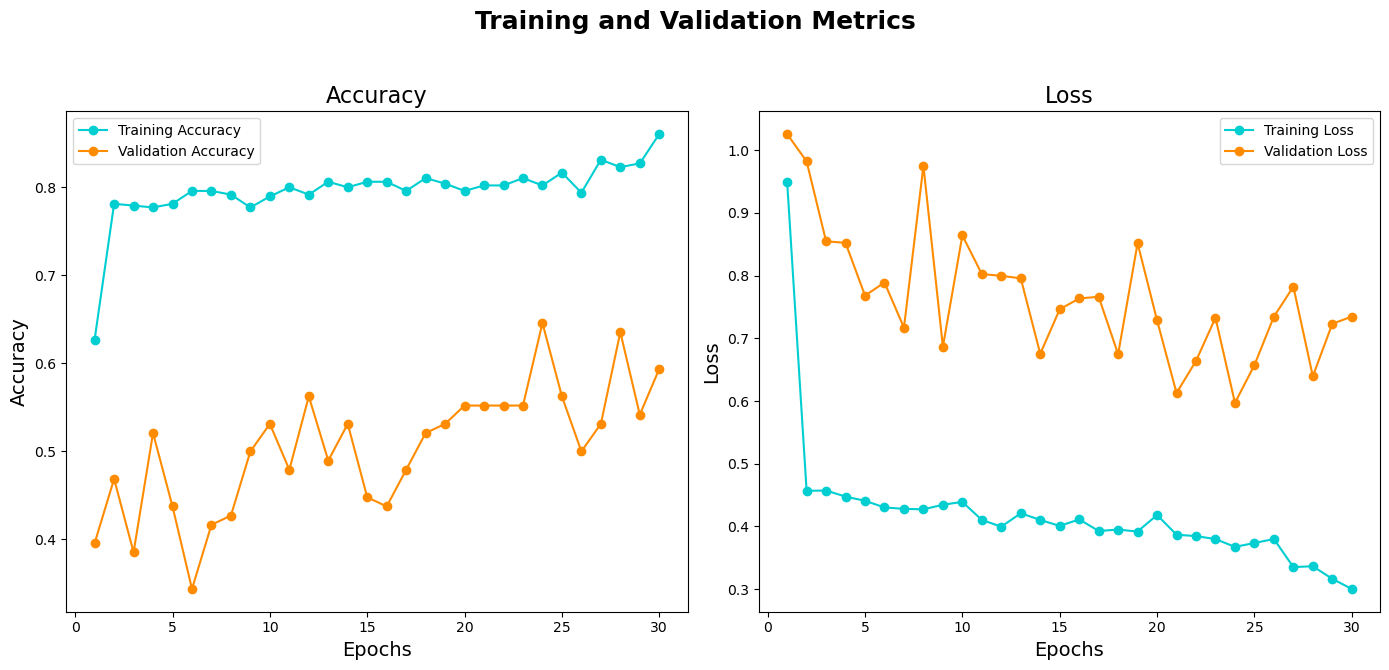

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Assuming 'history' is the result from model.fit()
epochs = range(1, len(history.history['accuracy']) + 1)

# Setup for the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Data for plots
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Title for the figure
fig.suptitle('Training and Validation Metrics', fontsize=18, fontweight='bold')

# Accuracy plot
ax[0].plot(epochs, train_acc, 'o-', color="darkturquoise", label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'o-', color="darkorange", label='Validation Accuracy')
ax[0].set_title('Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend(loc='best')

# Loss plot
ax[1].plot(epochs, train_loss, 'o-', color="darkturquoise", label='Training Loss')
ax[1].plot(epochs, val_loss, 'o-', color="darkorange", label='Validation Loss')
ax[1].set_title('Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend(loc='best')

# Improve layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# To save the figure
# fig.savefig("TrainingValidationMetrics.png")


In [3]:
import cv2
import numpy as np
model.save('MRI_CNN2.keras')
model.save("MRI_CNN2.h5")

In [4]:
def convert_to_grayscale(img_path):
    # Read the image using cv2
    img = cv2.imread(img_path)
    # Convert BGR to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

In [5]:
def preprocess_image(img_path):
    # Read the image using cv2
    img = cv2.imread(img_path)
    # Resize the image to the target size
    img = cv2.resize(img, (224, 224))
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Expand dimensions and normalize
    img_array = np.expand_dims(img, axis=0) / 255.0
    return img_array

def classify_image(img_array):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return predicted_class, predictions[0]


In [6]:
uploaded_file = 't5.png'

# Display the uploaded image
# display_image(uploaded_file)

# Preprocess the image
# hey= convert_to_grayscale(uploaded_file)
img_array = preprocess_image(uploaded_file)

# Make predictions
predicted_class, confidence_scores = classify_image(img_array)

# Display the result
class_labels = ["open", "close"]
print(f"The model predicts this image as: {class_labels[predicted_class]}")
print("Confidence Scores:")
for i, score in enumerate(confidence_scores):
    print(f"Class {i} ({class_labels[i]}): {score:.2%}")

1/1 [==============================] - 0s 61ms/step
The model predicts this image as: open
Confidence Scores:
Class 0 (open): 0.57%


In [7]:
uploaded_file = 't5.png'

# Preprocess the image
img_array = preprocess_image(uploaded_file)

# Make predictions
predicted_class, confidence_scores = classify_image(img_array)

# Display the result
class_labels = ["open", "close"]
print(f"The model predicts this image as: {class_labels[predicted_class]}")
print("Confidence Scores:")
for i, score in enumerate(confidence_scores):
    print(f"Class {i} ({class_labels[i]}): {score:.2%}")

1/1 [==============================] - 0s 29ms/step
The model predicts this image as: open
Confidence Scores:
Class 0 (open): 0.57%


Found 600 images belonging to 2 classes.
19/19 [==============================] - 2s 115ms/step
Accuracy: 50.00%
Confusion Matrix:
[[258  42]
 [ 17 283]]


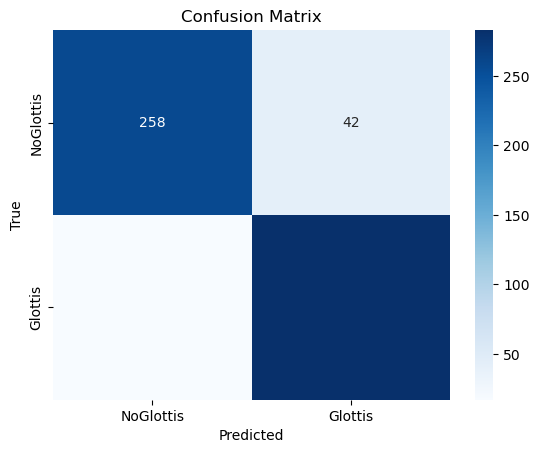

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir,  # Path to your test dataset
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification
    shuffle=False  # Do not shuffle for evaluation
)

# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

# Get the true labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    labels=tf.constant(true_labels),
    predictions=tf.constant(predicted_labels),
    num_classes=2  # Assuming binary classification
)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix.numpy())

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix.numpy(), annot=True, fmt="d", cmap="Blues", xticklabels=['NoGlottis', 'Glottis'], yticklabels=['NoGlottis', 'Glottis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('MRI_CNN.keras')
model.save("MRI_CNN.h5")